# Latent Factor Models
In this notebook, we train different latent factor models for events in the PHEME dataset, trying to see if latent factor models can separate rumour and non-rumour threads. We will also train these latent factor models on all the events to see if they can differentiate between different events.

## Load dependencies for this Jupyter Notebook
We need the function to read the thread level csv files. We also need to plot the results. Some latent factor models from Scikit Learn are also imported.

In [1]:
import pandas as pd
import time
import numpy as np
from functools import reduce

from lib.util import fetch_thread

import matplotlib.pyplot as plt

#latent-factor modeling:
from sklearn.decomposition import PCA,SparsePCA,KernelPCA
from sklearn.manifold import TSNE, Isomap

## Read CSV file for thread level features for all the events
For each event, fetch the thread level features and store them in a dictionary. 

In [2]:
events=[
            "ferguson",
            "charliehebdo",
            "germanwings-crash",
            "sydneysiege",
            "ottawashooting",
        ]

events_threads={}
for event in events:
    X,y=fetch_thread(event)
    X=X.drop(X.columns.values[np.where(np.isnan(X.values))[1]],axis=1)
    events_threads[event]={'X':X.values,'y':y.values}


### Data Preprocessing
Merge the data from different events if we want to train the latent factor models on more than one event.

In [3]:
def merge_datasets(events_to_merge):
    d=events_threads[events_to_merge[0]]['X'].shape[1]
    X=np.zeros((0,d))
    y=np.zeros((0))
    labels=np.zeros((0))
    ytag=np.zeros((0))
    i=0
    for event in events_to_merge:
        X=np.concatenate((X,events_threads[event]['X']),axis=0)
        y=np.concatenate((y,events_threads[event]['y']),axis=0)
        labels=np.concatenate((labels,['rumour' if x==1 else 'non-rumour' for x in events_threads[event]['y']]),axis=0)
        ytag=np.concatenate((ytag,i*np.ones(events_threads[event]['y'].shape)),axis=0)
        i+=1
    print(X.shape,y.shape)
    return X, y,ytag,labels

## Run the latent factor models on the Ferguson event
The Ferguson event is chosen arbitrarily among the events.

In [4]:
X,y,ytag,labels=merge_datasets(['germanwings-crash'])

(405, 111) (405,)


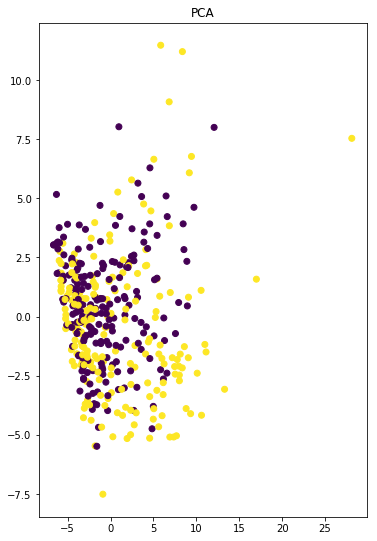

In [5]:
### PCA:
plt.figure(figsize=(20,20))


model=PCA(n_components=2)
model.fit(X)
Z_PCA=model.transform(X)
plt.subplot(2,3,1)
plt.title("PCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)


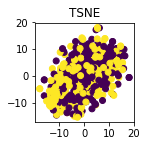

In [6]:
### TSNE:

model=TSNE(n_components=2)
Z_TSNE=model.fit_transform(X)
plt.subplot(2,3,2)
plt.title("TSNE")
plt.scatter(Z_TSNE[:,0],Z_TSNE[:,1],c=y)


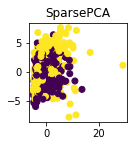

In [7]:
### SparsePCA:

model=SparsePCA(n_components=2,normalize_components=True)
model.fit(X)
Z_PCA=model.transform(X)
plt.subplot(2,3,3)
plt.title("SparsePCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)


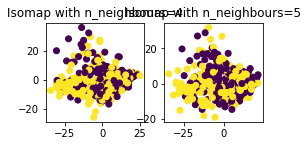

In [8]:
### Isomap:


model=Isomap(n_components=2,n_neighbors=4)
Z_Isomap=model.fit_transform(X)
plt.subplot(2,3,4)
plt.title("Isomap with n_neighbours=4")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=y)

model=Isomap(n_components=2,n_neighbors=5)
Z_Isomap=model.fit_transform(X)
plt.subplot(2,3,5)
plt.title("Isomap with n_neighbours=5")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=y)


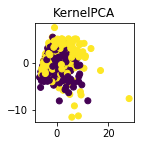

In [9]:
### KernelPCA:

model=KernelPCA(n_components=2)
model.fit(X)
Z_PCA=model.transform(X)
plt.subplot(2,3,6)
plt.title("KernelPCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)
plt.show()

### Interpretation of the results:
It can be seen that none of these latent factor models can distinguish between rumour and non-rumour events. Seems like based on the features that we have extracted, the use of a latent factor model to model the differences between rumour and non-rumour threads is not possible.

## Latent Factor models for all the events
In the following, we will train the latent factor models on all the events to see if the models can distinguish different events. 

In [10]:
X,y,ytag,labels=merge_datasets(events)

(5447, 111) (5447,)


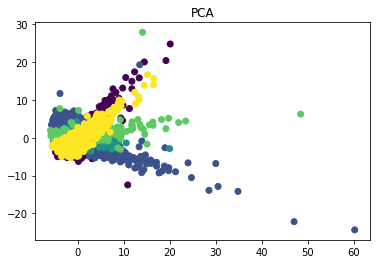

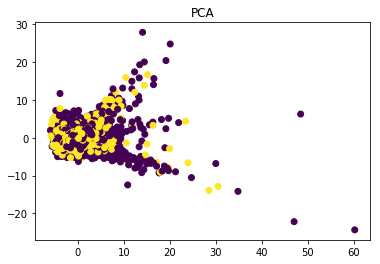

In [11]:
### PCA:

model=PCA(n_components=2)
model.fit(X)
Z_PCA=model.transform(X)
ax=plt.figure()
plt.title("PCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("PCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)
plt.show()

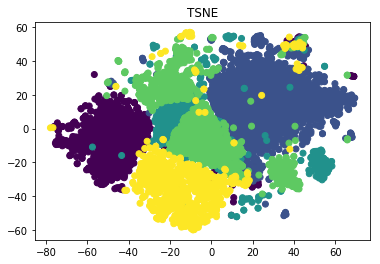

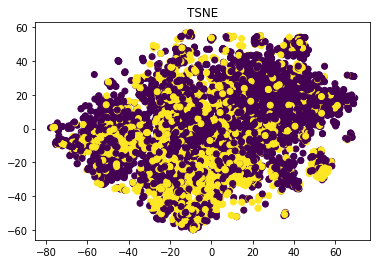

In [12]:
### TSNE:

model=TSNE(n_components=2)
Z_TSNE=model.fit_transform(X)
plt.figure()
plt.title("TSNE")
plt.scatter(Z_TSNE[:,0],Z_TSNE[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("TSNE")
plt.scatter(Z_TSNE[:,0],Z_TSNE[:,1],c=y)
plt.show()

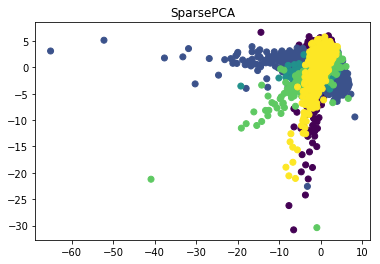

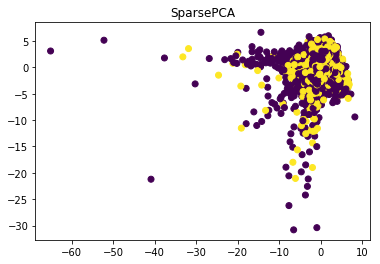

In [13]:
### SparsePCA:

model=SparsePCA(n_components=2,normalize_components=True)
model.fit(X)
Z_PCA=model.transform(X)
plt.figure()
plt.title("SparsePCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("SparsePCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)
plt.show()

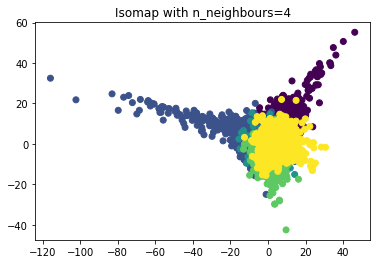

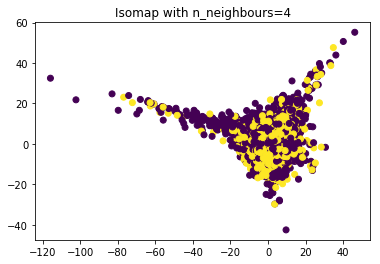

In [14]:
### Isomap:


model=Isomap(n_components=2,n_neighbors=4)
Z_Isomap=model.fit_transform(X)
plt.figure()
plt.title("Isomap with n_neighbours=4")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("Isomap with n_neighbours=4")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=y)
plt.show()

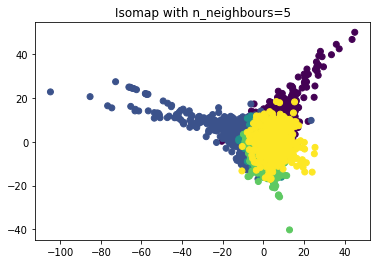

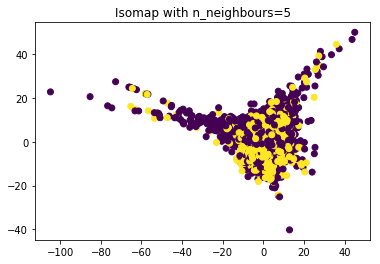

In [15]:
### Isomap:


model=Isomap(n_components=2,n_neighbors=5)
Z_Isomap=model.fit_transform(X)
plt.figure()
plt.title("Isomap with n_neighbours=5")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("Isomap with n_neighbours=5")
plt.scatter(Z_Isomap[:,0],Z_Isomap[:,1],c=y)
plt.show()

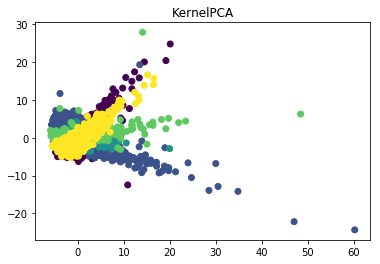

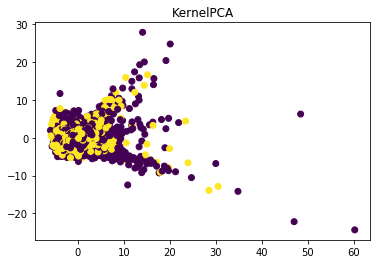

In [16]:
### KernelPCA:

model=KernelPCA(n_components=2)
model.fit(X)
Z_PCA=model.transform(X)
plt.figure()
plt.title("KernelPCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=ytag)
plt.show()
plt.figure()
plt.title("KernelPCA")
plt.scatter(Z_PCA[:,0],Z_PCA[:,1],c=y)
plt.show()

### Interpretation of results:
Looks like TSNE is able to distinguish between different events in the dataset by looking at our extracted features.
This can have some positive and negative interpretations. The negative interpretation is that if different events are distinguishable, generalizing the models trained for some events to predict on new events is hard. This result is also seen in the linear classifiers that we use in the classification models section: The linear models trained on some events can not detect romour in other events.